# Инфраструктура Python. Взаимодействие с системой

## Информация о системе

Получить информацию о версии Python и ОС, в которой он исполняется, можно с помощью встроенной библиотеки `platform`.

In [1]:
import platform, os, sys, psutil, datetime, itertools

In [2]:
print platform.python_version()
print sys.version_info
print platform.system()
print platform.platform()
print platform.processor()
print platform.uname()

2.7.12
sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0)
Windows
Windows-7-6.1.7601-SP1
Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
('Windows', 'PC', '7', '6.1.7601', 'AMD64', 'Intel64 Family 6 Model 158 Stepping 9, GenuineIntel')


Список путей, по которым Python ищет модули

In [3]:
sys.path

['',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\pcapy-0.10.10-py2.7-win-amd64.egg',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\xgboost-0.6-py2.7.egg',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\lightgbm-0.1-py2.7.egg',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\matrix_client-0.0.5-py2.7.egg',
 'C:\\Users\\User\\Anaconda2\\python27.zip',
 'C:\\Users\\User\\Anaconda2\\DLLs',
 'C:\\Users\\User\\Anaconda2\\lib',
 'C:\\Users\\User\\Anaconda2\\lib\\plat-win',
 'C:\\Users\\User\\Anaconda2\\lib\\lib-tk',
 'C:\\Users\\User\\Anaconda2',
 'c:\\users\\user\\anaconda2\\lib\\site-packages\\mako-1.0.7-py2.7.egg',
 'c:\\users\\user\\anaconda2\\lib\\site-packages\\sphinx-1.3.5-py2.7.egg',
 'c:\\users\\user\\anaconda2\\lib\\site-packages\\pydot_ng-1.0.1.dev0-py2.7.egg',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\win32',
 'C:\\Users\\User\\Anaconda2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\User\\Anaconda2\\lib\\si

Библиотека `psutil`, входящая в Anaconda, предоставляет доступ к подробной информации о системе, включая данные о загрузке процессора, памяти, дисков, о сетевых соединениях и интерфейсах, подробные данные о запущенных процессах.

In [4]:
print psutil.cpu_percent()
print psutil.cpu_times()
print psutil.virtual_memory()
print psutil.Process(os.getpid()).memory_info()

41.2
scputimes(user=109018.74043359999, system=53550.77527200058, idle=4543771.6129544, interrupt=8653.203868900002, dpc=3676.3663662999993)
svmem(total=17058418688L, available=11550265344L, percent=32.3, used=5508153344L, free=11550265344L)
pmem(rss=41066496L, vms=34725888L, num_page_faults=10191, peak_wset=41066496L, wset=41066496L, peak_paged_pool=185792L, paged_pool=185616L, peak_nonpaged_pool=64820L, nonpaged_pool=62964L, pagefile=34725888L, peak_pagefile=34725888L, private=34725888L)


In [5]:
print datetime.datetime.fromtimestamp(psutil.boot_time())

2018-07-26 18:39:11


In [6]:
def disk_usage(path):
    try:
        return psutil.disk_usage(path)
    except OSError as e:
        return str(e)
for part in psutil.disk_partitions():
    print part, disk_usage(part.mountpoint)

sdiskpart(device='C:\\', mountpoint='C:\\', fstype='NTFS', opts='rw,fixed') sdiskusage(total=255820034048L, used=255219888128L, free=600145920L, percent=99.8)
sdiskpart(device='D:\\', mountpoint='D:\\', fstype='NTFS', opts='rw,fixed') sdiskusage(total=2000397529088L, used=1999680503808L, free=717025280L, percent=100.0)
sdiskpart(device='E:\\', mountpoint='E:\\', fstype='', opts='cdrom') [Error 21] The device is not ready


In [7]:
psutil.disk_io_counters()

sdiskio(read_count=657629, write_count=4007933, read_bytes=24969614336L, write_bytes=76023567872L, read_time=21427L, write_time=526499L)

In [8]:
{k:v for k,v in psutil.net_if_addrs().items() if k.startswith('VMware')}

{'VMware Network Adapter VMnet1': [snic(family=-1, address='00-50-56-C0-00-01', netmask=None, broadcast=None, ptp=None),
  snic(family=2, address='192.168.127.1', netmask='255.255.255.0', broadcast=None, ptp=None),
  snic(family=23, address='2620:9b::196b:c813', netmask=None, broadcast=None, ptp=None),
  snic(family=23, address='fe80::ac53:1540:52b5:1f5d', netmask=None, broadcast=None, ptp=None)],
 'VMware Network Adapter VMnet8': [snic(family=-1, address='00-50-56-C0-00-08', netmask=None, broadcast=None, ptp=None),
  snic(family=2, address='192.168.204.1', netmask='255.255.255.0', broadcast=None, ptp=None),
  snic(family=23, address='fe80::841a:d187:63d8:f451', netmask=None, broadcast=None, ptp=None)]}

In [9]:
psutil.net_io_counters()

snetio(bytes_sent=4352045869L, bytes_recv=13650795437L, packets_sent=5419572L, packets_recv=12934791L, errin=0L, errout=0L, dropin=0L, dropout=0L)

In [10]:
psutil.net_io_counters(pernic=True)

{'Local Area Connection 2': snetio(bytes_sent=0L, bytes_recv=0L, packets_sent=0L, packets_recv=0L, errin=0L, errout=0L, dropin=0L, dropout=0L),
 'Loopback Pseudo-Interface 1': snetio(bytes_sent=0L, bytes_recv=0L, packets_sent=0L, packets_recv=0L, errin=0L, errout=0L, dropin=0L, dropout=0L),
 'VMware Network Adapter VMnet1': snetio(bytes_sent=971L, bytes_recv=0L, packets_sent=971L, packets_recv=0L, errin=0L, errout=0L, dropin=0L, dropout=0L),
 'VMware Network Adapter VMnet8': snetio(bytes_sent=827L, bytes_recv=0L, packets_sent=827L, packets_recv=0L, errin=0L, errout=0L, dropin=0L, dropout=0L),
 'Wireless Network Connection 2': snetio(bytes_sent=4352044071L, bytes_recv=13650795437L, packets_sent=5417774L, packets_recv=12934791L, errin=0L, errout=0L, dropin=0L, dropout=0L),
 'Wireless Network Connection 3': snetio(bytes_sent=0L, bytes_recv=0L, packets_sent=0L, packets_recv=0L, errin=0L, errout=0L, dropin=0L, dropout=0L)}

In [11]:
sorted(psutil.net_connections())[:10]

[sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=135), raddr=(), status='LISTEN', pid=856),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=902), raddr=(), status='LISTEN', pid=1300),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=912), raddr=(), status='LISTEN', pid=1300),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=1025), raddr=(), status='LISTEN', pid=600),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=1026), raddr=(), status='LISTEN', pid=924),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=1027), raddr=(), status='LISTEN', pid=1068),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=1028), raddr=(), status='LISTEN', pid=660),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=1029), raddr=(), status='LISTEN', pid=676),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip='0.0.0.0', port=3401), raddr=(), status='LISTEN', pid=3704),
 sconn(fd=-1, family=2, type=1, laddr=addr(ip

In [12]:
for process in itertools.islice(psutil.process_iter(), 0, 10):
    print process
print '...'

psutil.Process(pid=0, name='System Idle Process', started='2018-07-26 18:39:11')
psutil.Process(pid=4, name='System', started='2018-07-26 18:39:11')
psutil.Process(pid=200, name='winlogon.exe', started='2018-07-26 18:39:37')
psutil.Process(pid=236, name='svchost.exe', started='2018-07-26 18:39:45')
psutil.Process(pid=392, name='smss.exe', started='2018-07-26 18:39:30')
psutil.Process(pid=556, name='csrss.exe', started='2018-07-26 18:39:35')
psutil.Process(pid=600, name='wininit.exe', started='2018-07-26 18:39:36')
psutil.Process(pid=616, name='csrss.exe', started='2018-07-26 18:39:36')
psutil.Process(pid=660, name='services.exe', started='2018-07-26 18:39:36')
psutil.Process(pid=676, name='lsass.exe', started='2018-07-26 18:39:36')
...


In [13]:
process = psutil.Process(os.getpid())
for k, v in sorted(process.as_dict().items()):
    if k in 'connections memory_maps threads'.split():
        print '%-20s' % k, v[:3]
    elif k == 'environ':
        print '%-20s' % k, dict(v.items()[:3])
    else:
        print '%-20s' % k, v

cmdline              ['C:\\Users\\User\\Anaconda2\\python.exe', '-m', 'ipykernel', '-f', 'C:\\Users\\User\\AppData\\Roaming\\jupyter\\runtime\\kernel-dd367fc1-bb51-4a86-a42c-61fa2c10773a.json']
connections          [pconn(fd=-1, family=2, type=1, laddr=addr(ip='127.0.0.1', port=5905), raddr=addr(ip='127.0.0.1', port=10379), status='ESTABLISHED'), pconn(fd=-1, family=2, type=1, laddr=addr(ip='127.0.0.1', port=6275), raddr=(), status='LISTEN'), pconn(fd=-1, family=2, type=1, laddr=addr(ip='127.0.0.1', port=6275), raddr=addr(ip='127.0.0.1', port=10373), status='ESTABLISHED')]
cpu_affinity         [0, 1, 2, 3, 4, 5, 6, 7]
cpu_percent          0.0
cpu_times            pcputimes(user=0.4212027, system=0.2652017, children_user=0.0, children_system=0.0)
create_time          1533658373.0
cwd                  C:\Temp\jupyter_code\infrastructure
environ              {'TMP': 'C:\\Users\\User\\AppData\\Local\\Temp', 'COMPUTERNAME': 'PC', 'VS140COMNTOOLS': 'C:\\Program Files (x86)\\Microsoft Visual 

In [14]:
for service in psutil.win_service_iter():
    if service.name().startswith('h'):
        print service, service.status(), service.start_type()

WindowsService(name='hidserv', display_name='Human Interface Device Access') running manual
WindowsService(name='hkmsvc', display_name='Health Key and Certificate Management') stopped manual


## Производительность

### CPU

Производительность Питона **непростительно низка** в век, когда JavaScript на многих задачах работает быстрее Java и всего процентов на 20 медленнее C++. Проиллюстрируем это 2D ДП, вычисляющим расстояние Левенштейна. 

In [1]:
def levenshtein_distance(a, b):
    dp = [[0 for j in range(len(b) + 1)] for i in range(len(a) + 1)]
    for i in range(len(a) + 1):
        dp[i][0] = i
    for j in range(len(b) + 1):
        dp[0][j] = j

    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            dp[i][j] = min([
                dp[i - 1][j - 1] + (a[i - 1] != b[j - 1]),
                dp[i - 1][j] + 1,
                dp[i][j - 1] + 1,
            ])
    print dp[len(a)][len(b)]

In [2]:
import random, string

def rndstr(alpha, length):
    return ''.join([alpha[random.randint(0, len(alpha) - 1)] for i in range(length)])

random.seed(0)
a = rndstr(string.lowercase, 2000)
b = rndstr(string.lowercase, 2000)

Для получения деталей о:

* времени исполнения
    * только в ней самой (`tottime`)/в ней и всех вызываемых из нее (`cumtime`);
    * всего/за вызов (`percall`)
* количестве вызовов

можно использовать стандартную библиотеку `cProfile` https://docs.python.org/2/library/profile.html . Тот же вывод можно получить, исполнив модуль `cProfile` как `__main__` и передав ему задание и измеряемый скрипт в командной строке:

```bash
python -m cProfile -s time file.py
```

In [4]:
%%time
levenshtein_distance(a, b)

1766
Wall time: 2.25 s


In [5]:
import cProfile

In [6]:
cProfile.run('levenshtein_distance(a, b)')

1766
         4008035 function calls in 2.574 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.042    2.042    2.544    2.544 <ipython-input-1-e7c32ddf8c92>:1(levenshtein_distance)
        1    0.030    0.030    2.574    2.574 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 iostream.py:102(_check_mp_mode)
        2    0.000    0.000    0.000    0.000 iostream.py:207(write)
        2    0.000    0.000    0.000    0.000 iostream.py:93(_is_master_process)
        2    0.000    0.000    0.000    0.000 utf_8.py:15(decode)
        2    0.000    0.000    0.000    0.000 {_codecs.utf_8_decode}
        2    0.000    0.000    0.000    0.000 {isinstance}
     4007    0.000    0.000    0.000    0.000 {len}
        2    0.000    0.000    0.000    0.000 {method 'decode' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.0

Для сравнения библиотека `python-Levenshtein`, написанная на C, работает примерно в 200 раз быстрее.

In [7]:
import Levenshtein

In [8]:
%%time
Levenshtein.distance(a, b)

Wall time: 14 ms


1766

Обычно несколько более полезный результат выдает построчный профайлинг, для которого следует поставить библиотеку `line_profiler`. Впрочем, он добавляет значительный оверхед, в несколько раз увеличивая время исполнения.

```
pip install line_profiler
```

In [21]:
import line_profiler

In [22]:
line_profiler.LineProfiler(levenshtein_distance).run('levenshtein_distance(a, b)').print_stats()

1766
Timer unit: 3.64637e-07 s

Total time: 10.1364 s
File: <ipython-input-15-e7c32ddf8c92>
Function: levenshtein_distance at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def levenshtein_distance(a, b):
     2   4006003    3418257.0      0.9     12.3      dp = [[0 for j in range(len(b) + 1)] for i in range(len(a) + 1)]
     3      2002       1625.0      0.8      0.0      for i in range(len(a) + 1):
     4      2001       2336.0      1.2      0.0          dp[i][0] = i
     5      2002       1524.0      0.8      0.0      for j in range(len(b) + 1):
     6      2001       1868.0      0.9      0.0          dp[0][j] = j
     7                                           
     8      2001       2470.0      1.2      0.0      for i in range(1, len(a) + 1):
     9   4002000    3414580.0      0.9     12.3          for j in range(1, len(b) + 1):
    10   4000000    3317047.0      0.8     11.9              dp[i][j] = min([
  

Советы по оптимизации кода на Python:
* Грубо говоря, если C++ может выполнить строку 1ккк раз за секунду, Python может 10кк https://benchmarksgame-team.pages.debian.net/benchmarksgame/faster/python3-gpp.html
* Пишите код кратко, выражая намерения. Большинство кулхацкерских методик из C++ неприменимы в Python
* Предпочитайте библиотечные вызовы своему коду, особенно с циклами — библиотеки часто реализованы на значительно более производительном языке
* Векторизуйте вычисления, насколько это возможно
* Если вычисления в основном числовые, можно попробовать `@numba.jit` или `@parakeet.jit` (не придумал рабочий бенчмарк)
* Если все тяжело, перепишите затратную часть кода на C++, используя для взаимодействия Boost.Python или просто консольный вывод.

### Память

Переменные в Python представлены довольно сложными объектами, весящими почти всегда больше своих си-аналогов. Если нужно хранить много информации, стоит хранить ее, например, в `numpy`-массивах, которые используют машинные типы хранения, а не в `list`, а то и обратиться к разреженным матрицам из `scipy.sparse`.

In [23]:
for item in [0, 2 ** 80, '', 'a' * 100, [], [0] * 10, [0] * 100, {}, {'a':100}, {k:100 for k in string.lowercase}]:
    print sys.getsizeof(item), '\t', repr(item)

24 	0
36 	1208925819614629174706176L
33 	''
133 	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'
64 	[]
144 	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
864 	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
272 	{}
272 	{'a': 100}
3344 	{'a': 100, 'c': 100, 'b': 100, 'e': 100, 'd': 100, 'g': 100, 'f': 100, 'i': 100, 'h': 100, 'k': 100, 'j': 100, 'm': 100, 'l': 100, 'o': 100, 'n': 100, 'q': 100, 'p': 100, 's': 100, 'r': 100, 'u': 100, 't': 100, 'w': 100, 'v': 100, 'y': 100, 'x': 100, 'z': 100}


Пример демонстрирует, как создается большой `numpy`-массив (на 8 МБ), при этом выделенная процессу виртуальная память увеличивается на 8 МБ, но физическая увеличивается ненамного, потому что реальные данные еще не начали записываться на выделенные нулевые страницы (если `numpy.zeros` заменить на `numpy.ones`, `rss` вырастет сразу). Затем в массив пишутся данные и `rss` вырастает на примерно те же 8 МБ. После этого переменная удаляется оператором `del` (фактически происходит уменьшение счетчика ссылок до 0 и сборка сборщиком мусора, который можно позвать принудительно `gc.collect()`) и использование и физической и виртуальной памяти сокращается на все выделенные ранее 8 МБ.

Функция `sys.getsizeof`, примененная к значениям в `globals()` может помочь отыскать жирные переменные, которые больше не нужны. Вы не хотите знать, как выглядит более полный ответ на вопрос «Кто в Python сожрал мою память?».

In [24]:
import numpy

In [25]:
was_memory = None
def calc_memory():
    global was_memory
    mem = psutil.Process(os.getpid()).memory_info()
    print mem
    if was_memory:
        print 'Δrss %+d  Δvms %+d' % (mem.rss - was_memory.rss, mem.vms - was_memory.vms)
    print
    was_memory = mem

In [26]:
calc_memory()
LARGE = numpy.zeros((1000, 1000), dtype=numpy.float64)
calc_memory()
for i in xrange(1000):
    for j in xrange(1000):
        LARGE[i,j] = i * j
calc_memory()
print sorted([(sys.getsizeof(v), k, type(v)) for k, v in globals().iteritems()], reverse=True)[:5]
print
del LARGE
calc_memory()

pmem(rss=155652096L, vms=385712128L, num_page_faults=61003, peak_wset=174006272L, wset=155652096L, peak_paged_pool=268152L, paged_pool=268152L, peak_nonpaged_pool=69008L, nonpaged_pool=67664L, pagefile=385712128L, peak_pagefile=386719744L, private=385712128L)

pmem(rss=155656192L, vms=393728000L, num_page_faults=61004, peak_wset=174006272L, wset=155656192L, peak_paged_pool=268152L, paged_pool=268152L, peak_nonpaged_pool=69008L, nonpaged_pool=67784L, pagefile=393728000L, peak_pagefile=393728000L, private=393728000L)
Δrss +4096  Δvms +8015872

pmem(rss=163676160L, vms=393728000L, num_page_faults=62962, peak_wset=174006272L, wset=163676160L, peak_paged_pool=268152L, paged_pool=268152L, peak_nonpaged_pool=69008L, nonpaged_pool=67784L, pagefile=393728000L, peak_pagefile=393728000L, private=393728000L)
Δrss +8019968  Δvms +0

[(8000112, 'LARGE', <type 'numpy.ndarray'>), (3344, 'item', <type 'dict'>), (2033, 'b', <type 'str'>), (2033, 'a', <type 'str'>), (1040, '_oh', <type 'dict'>)]

pmem(rs

## Отладка

Python включает в себя стандартную библиотеку `pdb` для отладки кода в консольном отладчике, похожем на `gdb`. Отладчик активируется при вызове `pdb.set_trace()` или при исключении, после чего запрашивает из stdin команды или Python-код для исполнения в текущем контексте.

Популярные команды:
* `?` — подсказка
* `c` — continue, продолжить исполнение
* `q` — quit, прервать исполнение и отладку
* `s` — step inside, шаг с заходом
* `n` — next, step over, шаг без захода
* `r` — return, step out, исполнить до конца текущей функции
* `p`, `pp` — print, pretty print
* `bt` — backtrace, стек
* `u`, `d` — up, down, подняться или спуститься по стеку
* `l` — list, окрестность текущей строки

Подробнее https://docs.python.org/3/library/pdb.html https://habr.com/post/104086/

Следует отметить, что IPython парсит код верхнего уровня в ячейке в AST, так что для вменяемых шагов трейса следует заключить исполняемые строки в тело функции.

todo Нормальный пример трейса

In [11]:
import pdb

In [13]:
def run():
    result = 1
    pdb.set_trace()
    for i in range(1, 6):
        result *= i
    print result
run()

> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) n
> <ipython-input-13-2b070f16f172>(5)run()
-> result *= i
(Pdb) p i
1
(Pdb) p result
1
(Pdb) n
> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) p result
1
(Pdb) print i, result
1 1
(Pdb) n
> <ipython-input-13-2b070f16f172>(5)run()
-> result *= i
(Pdb) print i, result
2 1
(Pdb) n
> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) print i, result
2 2
(Pdb) n
> <ipython-input-13-2b070f16f172>(5)run()
-> result *= i
(Pdb) 
> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) 
> <ipython-input-13-2b070f16f172>(5)run()
-> result *= i
(Pdb) 
> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) 
> <ipython-input-13-2b070f16f172>(5)run()
-> result *= i
(Pdb) print i, result
5 24
(Pdb) n
> <ipython-input-13-2b070f16f172>(4)run()
-> for i in range(1, 6):
(Pdb) pp result
120
(Pdb) n
> <ipython-input-13-2b070f16f172>(6)run()
-> print result


In [15]:
pdb.set_trace()
br = False
result = 1
for i in range(1, 6):
    if i == 5:
        br = True
    result *= i
    if br:
        raise Exception('wat')
print result

--Return--
> <ipython-input-15-951ca1d6453c>(1)<module>()->None
-> pdb.set_trace()
(Pdb) c


Exception: wat

In [9]:
%debug

> <ipython-input-8-61bbd8567975>(8)<module>()
      7     if br:
----> 8         raise Exception('wat')
      9 print result

ipdb> j 9
*** Jump failed: f_lineno can only be set by a line trace function
ipdb> c


In [ ]:
sys.exc_clear()

Непохоже, что есть способ восстановиться из дебаггера при исключении

In [69]:
%pdb

Automatic pdb calling has been turned OFF


При исключениях Python показывает стек вызовов функции, в которой исключение было выброшено. Это удобное сообщение можно получить, используя встроенную библиотеку `traceback`. Легко заметить, что IPython фильтрует большую часть стека с его собственными функциями, которые и приводят к принятию пользовательского кода из ячейки IPython в браузере (через процесс-диспетчер) на его исполнение в контексте процесса-кернеля.

In [23]:
import traceback

def foo():
    a = 42
    print traceback.extract_stack()
    traceback.print_stack()
    raise Exception('traceback')
foo()

[('C:\\Users\\User\\Anaconda2\\lib\\runpy.py', 174, '_run_module_as_main', '"__main__", fname, loader, pkg_name)'), ('C:\\Users\\User\\Anaconda2\\lib\\runpy.py', 72, '_run_code', 'exec code in run_globals'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\ipykernel\\__main__.py', 3, '<module>', 'app.launch_new_instance()'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\traitlets\\config\\application.py', 658, 'launch_instance', 'app.start()'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\ipykernel\\kernelapp.py', 405, 'start', 'ioloop.IOLoop.instance().start()'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\zmq\\eventloop\\ioloop.py', 162, 'start', 'super(ZMQIOLoop, self).start()'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\tornado\\ioloop.py', 883, 'start', 'handler_func(fd_obj, events)'), ('C:\\Users\\User\\Anaconda2\\lib\\site-packages\\tornado\\stack_context.py', 275, 'null_wrapper', 'return fn(*args, **kwargs)'), ('C:\\Users\\User\\Anaconda2\\lib\\site-pack

  File "C:\Users\User\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\User\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\User\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\User\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\User\Anaconda2\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\User\Anaconda2\lib\site-packages\tornado\ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "C:\Users\User\Anaconda2\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\

Exception: traceback

## Вывод

Вывод в стандартный потока вывода доступен через инструкцию `print`. Она кэширует вывод, что иногда может быть неудобно. В этом случае используйте метод `flush()` у `sys.stdout`.

In [32]:
import time

In [46]:
print 'wait'; sys.stdout.flush()
time.sleep(0.5)
print 'for'
time.sleep(0.5)
print 'me'

wait
for
me


Несколько олдфажный синтаксис позволяет указывать `print`, в какой файловый дескриптор ему писать.

In [47]:
print >>sys.stderr, 'Hello'

Hello


In [48]:
sys.stderr.write('Hello')

Hello

Сообщения об ошибках удобнее выводить, используя встроенную библиотеку `logging`, позволяющую настраивать уровень подробности сообщений (по умолчанию `WARNING`).

In [1]:
import logging
logger = logging.getLogger()
lvl = logger.level
logger.setLevel(logging.DEBUG)
logger.debug('hello')
logger.info('hello')
logger.warning('hello')
logger.error('hello')
try:
    raise Exception('wat')
except:
    logger.exception('hello')
logger.critical('hello')
logger.setLevel(lvl)

DEBUG:root:hello
INFO:root:hello
ERROR:root:hello
ERROR:root:hello
Traceback (most recent call last):
  File "<ipython-input-1-16b7b1fd3503>", line 10, in <module>
    raise Exception('wat')
Exception: wat
CRITICAL:root:hello


## Файловая система

Для работы с большинством файлов удобнее всего использовать такие функции, читающие и пишущие файл целиком

In [50]:
def file_put(fn, text):
    with open(fn, 'wb') as fp:
        fp.write(text)
        
def file_get(fn):
    with open(fn, 'rb') as fp:
        s = fp.read()
    return s

Читать файл, открытый через `open` можно побайтово `.read([size])`, построчно `.readlines([size])` или построчно циклом `for line in fp`. Всегда используйте `'rb'`, `'wb'` или `'ab'` (append) как режимы открытия файлов.

Если библиотека принимает хандл файла (например, как `PIL.Image.save`), почти всегда ей можно скормить файлоподобный объект `BytesIO` из встроенной библиотеки `io`, который пишет в память.

In [51]:
import PIL.Image
from io import BytesIO
im = PIL.Image.new('RGB', (32, 32), (255,0,0))
buf = BytesIO()
im.save(buf, 'PNG')
buf.getvalue()

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x02\x00\x00\x00\xfc\x18\xed\xa3\x00\x00\x00(IDATx\x9c\xed\xcd1\x01\x00\x00\x08\xc30\xc0\xbfg0\xc1\xbeT@\xd3[\xd9&\xfc\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00o\x1d\xa3\xc4\x01?\x8b`#:\x00\x00\x00\x00IEND\xaeB`\x82'

Работа с путями

In [17]:
import os

In [53]:
print os.path.normpath('c:/')

c:\


In [54]:
d = os.path.join('c:\\folder', 'folder2\\file.txt')
print d

c:\folder\folder2\file.txt


In [56]:
print os.path.dirname(d)
print os.path.basename(d)
print os.path.splitdrive(d)
print os.path.split(d)
print os.path.splitext(d)

c:\folder\folder2
file.txt
('c:', '\\folder\\folder2\\file.txt')
('c:\\folder\\folder2', 'file.txt')
('c:\\folder\\folder2\\file', '.txt')


In [57]:
print repr(os.getcwd())
print repr(os.getcwdu())

'C:\\Temp\\jupyter_code\\infrastructure'
u'C:\\Temp\\jupyter_code\\infrastructure'


Для смены текущей папки используйте `os.chdir`.

In [22]:
print os.path.isdir('files'), os.path.isdir('files/__temp__.mp4')
print os.path.exists('files'), os.path.exists('files/no_such_file.txt')
print os.path.abspath('files')

True False
True False
C:\Temp\jupyter_code\infrastructure\files


Просмотр папки

In [58]:
for f in os.listdir('.'):
    filename, ext = os.path.splitext(f)
    if ext.lower() == '.ipynb':
        print '%8d' % os.path.getsize(f), filename

  107271 infrastructure_01_language
  115774 infrastructure_02_strings_dates_collections
  151784 infrastructure_03_system
  747175 infrastructure_04_data_sources
   62593 infrastructure_05_rich_output
  396068 infrastructure_06_web
  338992 infrastructure_07_math
  481966 infrastructure_08_cas
 1354597 infrastructure_09_graphs
 6669674 infrastructure_10_visualization
  407129 infrastructure_11_machine_learning
  670044 infrastructure_12_media
  253603 infrastructure_13_gui
  111275 infrastructure_14_ctf
 2556985 infrastructure_15_3d
    3808 ipynb_text_size
   13196 ogarok_epistemic
    1674 ogarok_probprog
  121267 ogarok_termeh
  980765 rawnb_to_cells


Вариант с символами `*` и `?` реализован во встроенной библиотеке `glob`

In [59]:
import glob
glob.glob('*.ipynb')

['infrastructure_01_language.ipynb',
 'infrastructure_02_strings_dates_collections.ipynb',
 'infrastructure_03_system.ipynb',
 'infrastructure_04_data_sources.ipynb',
 'infrastructure_05_rich_output.ipynb',
 'infrastructure_06_web.ipynb',
 'infrastructure_07_math.ipynb',
 'infrastructure_08_cas.ipynb',
 'infrastructure_09_graphs.ipynb',
 'infrastructure_10_visualization.ipynb',
 'infrastructure_11_machine_learning.ipynb',
 'infrastructure_12_media.ipynb',
 'infrastructure_13_gui.ipynb',
 'infrastructure_14_ctf.ipynb',
 'infrastructure_15_3d.ipynb',
 'ipynb_text_size.ipynb',
 'ogarok_epistemic.ipynb',
 'ogarok_probprog.ipynb',
 'ogarok_termeh.ipynb',
 'rawnb_to_cells.ipynb']

Проверять строку маской вида `?a*.txt` можно с помощью встроенной библиотеки `fnmatch`.

In [60]:
from fnmatch import fnmatch
[filename for filename in os.listdir('.') if fnmatch(filename, 'infra*.ipynb')]

['infrastructure_01_language.ipynb',
 'infrastructure_02_strings_dates_collections.ipynb',
 'infrastructure_03_system.ipynb',
 'infrastructure_04_data_sources.ipynb',
 'infrastructure_05_rich_output.ipynb',
 'infrastructure_06_web.ipynb',
 'infrastructure_07_math.ipynb',
 'infrastructure_08_cas.ipynb',
 'infrastructure_09_graphs.ipynb',
 'infrastructure_10_visualization.ipynb',
 'infrastructure_11_machine_learning.ipynb',
 'infrastructure_12_media.ipynb',
 'infrastructure_13_gui.ipynb',
 'infrastructure_14_ctf.ipynb',
 'infrastructure_15_3d.ipynb']

Рекурсивный просмотр папки

In [61]:
import datetime
for root, dirs, files in os.walk('.'):
    for f in files:
        fn = os.path.join(root, f)
        print '%8d' % os.path.getsize(fn), datetime.datetime.fromtimestamp(os.path.getmtime(fn)), fn

    3859 2018-06-12 18:06:19.285000 .\1.txt
    3871 2018-06-12 18:06:36.461000 .\2.txt
  274629 2018-06-15 18:14:51.358000 .\gif_wrongsize.pickle
  345913 2018-05-05 18:13:27.110000 .\infrastructure_01_language.html
  107271 2018-05-24 21:38:42.602000 .\infrastructure_01_language.ipynb
  369771 2018-05-05 18:13:27.370000 .\infrastructure_02_strings_dates_collections.html
  115774 2018-05-24 21:38:48.104000 .\infrastructure_02_strings_dates_collections.ipynb
  356499 2018-05-05 18:13:27.507000 .\infrastructure_03_system.html
  151784 2018-08-07 19:19:55.614000 .\infrastructure_03_system.ipynb
  767885 2018-05-05 18:13:27.736000 .\infrastructure_04_data_sources.html
  747175 2018-08-05 19:40:14.966101 .\infrastructure_04_data_sources.ipynb
  276354 2018-05-05 18:13:27.838000 .\infrastructure_05_rich_output.html
   62593 2018-08-07 18:58:43.825000 .\infrastructure_05_rich_output.ipynb
  451226 2018-05-05 18:13:27.902000 .\infrastructure_06_web.html
  396068 2018-05-26 23:43:16.313000 .\i

В Windows использование простых строк в качестве путей может вызывать проблемы:
    
* Кодировкой таких строк Windows считает системную однобайтовую, например, cp1251. Пути с символами, которых в cp1251 нет, будут портиться. Просто используйте в этом случае юникод-строки вида `u'c:\\'`
* По умолчанию Windows предоставляет пути длиной до MAX_PATH=260. На пользовательских накопителях встречаются и длиннее. Тогда используйте т.н. UNC-пути вида `\\?\c:\filename` (учитывая эскейп!)

Шпаргалка по функциям для управления файлами. Операции, затрагивающие сразу много файлов, реализованы во встроенной библиотеке `shutil`.

|Операция|Над файлом|Над пустой папкой|Над деревом|
|---|---|---|---|
|Копирование|`shutil.copy2`|—|`shutil.copytree`|
|Перемещение/переименование|`os.rename`|—|`shutil.move`|
|Удаление|`os.remove`|`os.rmdir`|`shutil.rmtree`|
|Создание|`open`|`os.mkdir`|—|

## Аргументы командной строки и переменные окружения

Поскольку IT до сих пор больно чудищем родом из 70-х по имени CLI (command line interface), иногда приходится обрабатывать командную строку. Она передается после разделения по пробелам в массив `sys.argv`. Например, команда

```bash
python file.py A B C
```

приведет к исполнению `file.py`, у которого в `sys.argv` будет массив `['file.py', 'A', 'B', 'C']`. В IPython интерпретатор ячеек (ядро) уже запущен с аргументами, которые позволяют ему коннектиться к серверу и получать от него строки на исполнение.

In [62]:
sys.argv

['C:\\Users\\User\\Anaconda2\\lib\\site-packages\\ipykernel\\__main__.py',
 '-f',
 'C:\\Users\\User\\AppData\\Roaming\\jupyter\\runtime\\kernel-dd367fc1-bb51-4a86-a42c-61fa2c10773a.json']

Задавать магические буквы в командной строке, вместо понятных идентификаторов в коде или объяснений на человеческом языке в GUI, болезненно для пользователя, но еще более болезненно для программиста, которому нужно корректно обработать то, что ему прислали, вывести сообщения об ошибке парсинга и документацию по магическим буквам.

Чаще всего для упрощения этой задачи используется встроенная библиотека `argparse`. В консольной программе для чтения аргументов из `sys.argv`, а не из своего массива строк, взятого для демонстрации, используют `parser.parse_args()` без аргументов.

In [63]:
from argparse import ArgumentParser
parser = ArgumentParser(description='My app')
parser.add_argument(
    '-ll', '--loglevel',
    type=str,
    choices=['DEBUG','INFO','WARNING','ERROR','CRITICAL'],
    help='Set the logging level',
    default='DEBUG'
)
args = parser.parse_args(args=['--loglevel=ERROR'])
print args
print args.loglevel

Namespace(loglevel='ERROR')
ERROR


In [64]:
print parser.format_usage()

usage: __main__.py [-h] [-ll {DEBUG,INFO,WARNING,ERROR,CRITICAL}]



Переменные окружения

In [65]:
len(os.environ['PATH'].split(';'))

37

## Запуск внешних программ

Для запуска других программ можно использовать встроенную библиотеку `subprocess`

In [66]:
import subprocess

cmd = 'ping 8.8.8.8'
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
errs = p.stderr.read()
result = p.stdout.read()
ret = p.wait()
print errs, result, ret

 
Pinging 8.8.8.8 with 32 bytes of data:
Reply from 8.8.8.8: bytes=32 time=39ms TTL=54
Reply from 8.8.8.8: bytes=32 time=40ms TTL=54
Reply from 8.8.8.8: bytes=32 time=37ms TTL=54
Reply from 8.8.8.8: bytes=32 time=40ms TTL=54

Ping statistics for 8.8.8.8:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 37ms, Maximum = 40ms, Average = 39ms
0


Но удобнее использовать библиотеку `delegator`.

```
pip install delegator.py
```

In [67]:
import delegator

result = delegator.run('ping 8.8.8.8')
print result.err, result.out, result.return_code

 
Pinging 8.8.8.8 with 32 bytes of data:
Reply from 8.8.8.8: bytes=32 time=35ms TTL=54
Reply from 8.8.8.8: bytes=32 time=40ms TTL=54
Reply from 8.8.8.8: bytes=32 time=34ms TTL=54
Reply from 8.8.8.8: bytes=32 time=34ms TTL=54

Ping statistics for 8.8.8.8:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 34ms, Maximum = 40ms, Average = 35ms
0


Можно запускать ассоциированное с файлом приложение:

In [134]:
os.startfile('files/__temp__.mp4')

## Параллельность

In [78]:
from multiprocessing import cpu_count
print cpu_count()

8


### ipyparallel

Для утилизации нескольких ядер (или машин) из IPython можно использовать библиотеку `ipyparallel`, предоставляющую набор инструментов для вычислений в нескольких запущенных процессах. Хитрые конфиги позволяют запускать этот пул воркеров не только на локальной машине, но и, например, по SSH.

```
pip install ipyparallel
```

Пример: скачивание урлов (с эксепшнами), синхронное, асинхронное (с отслеживанием прогресса, перехода между тасками, завершений, возможностью паузы/прервать), балансировка задач, вычисления до первого успеха (брут хэша). Импорты, данные и функции из нотебука.

In [2]:
import ipyparallel

В отдельном окне с командной строкой исполнить 

    ipcluster start
    
или с указанием числа ядер

    ipcluster start --n 7

In [ ]:
import delegator
delegator.run('ipcluster start --n 7')

Объект клиента предоставляет обертку над процессами-воркерами.

In [4]:
client = ipyparallel.Client()

In [5]:
client.ids

[0, 1, 2, 3, 4, 5, 6, 7]

Объект View позволяет назначать задания одному, нескольким или всем воркерам кластера.

In [6]:
view = client[:]

In [7]:
import os, time

In [8]:
view.apply_sync(os.getpid)

[5428, 5904, 5624, 3700, 756, 6140, 2008, 5644]

In [11]:
def calc(x, y):
    import time
    time.sleep(0.5)
    return x + y

Задачи могут выполняться как синхронно (20 вызовов `calc` на 8 ядрах займут 3 * 0.5 секунд)

In [12]:
%%time
res = view.map_sync(calc, range(20), range(20))
print res

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
Wall time: 1.54 s


так и асинхронно (результат реализует концепцию future).

In [13]:
%%time
res = view.map_async(calc, range(50), range(50))
print res.get()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
Wall time: 3.51 s


In [16]:
%%time
res = view.map_async(calc, range(50), range(50))
print res

<AsyncMapResult: calc>
Wall time: 28 ms


In [17]:
%%time
t0 = time.time()
while True:
    try:
        res.get(timeout=1.0)
        print res.result()
        break
    except ipyparallel.TimeoutError:
        print 'not yet done,', time.time() - t0, 's passed'
        pass

not yet done, 1.00099992752 s passed
not yet done, 2.00099992752 s passed
not yet done, 3.00099992752 s passed
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
Wall time: 3.41 s


Если воркер в процессе исполнения кидает исключение, падает вся задача, `.result()` получить нельзя, потому что он перекидывает исключение в месте вызова, поэтому следует всегда оборачивать тело функции задачи в `try`-`except`.

In [121]:
def raise7(n):
    if n == 7:
        raise Exception('don\'t like seven')

res = view.map_async(raise7, range(10))
print res
res.wait()
print res.status
try:
    res.result()
except Exception as e:
    print e

<AsyncMapResult: raise7>
[u'ok', u'ok', u'ok', u'ok', u'ok', u'error', u'ok', u'ok']
one or more exceptions from call to method: raise7
[Engine Exception]Exception: don't like seven


#### Балансировка нагрузки

Если задачи занимают ощутимо разное количество времени, просто закидывать их в очередь к воркерам — не лучшая идея. Следует воспользоваться вместо `DirectView` `LoadBalancedView`, который будет распределять задания по свободным воркерам.

Чтобы воркер импортировал нужные библиотеки, можно воспользоваться декоратором `@ipyparallel.require`.

In [92]:
@ipyparallel.require('math', 'time')
def isprime_chunk(a, b):
    t0 = time.time()
    print 'start at', t0, 'with', a, b

    def isprime(n):
        if n < 2:
            return False
        if n == 2:
            return True
        for i in range(2, int(math.sqrt(n)) + 1):
            if n % i == 0:
                return False
        return True

    result = None
    try:
        result = [isprime(n) for n in range(a, b)]
    except Exception as e:
        print 'exception', e

    t1 = time.time()
    print 'done at', t1, 'spent', t1 - t0, 's'
    return result

In [93]:
%%time
up = 1000000
chunk = 100000
res = client.load_balanced_view().map_async(isprime_chunk, range(0, up, chunk), range(chunk, up, chunk) + [up])

Wall time: 12 ms


In [94]:
res.wait_interactive()

  10/10 tasks finished after    2 s
done


In [95]:
print sum(map(sum, res.result()))

from sympy import primepi
print primepi(up-1)

78498
78498


In [96]:
res.display_outputs()

[stdout:7] 
start at 1533660328.47 with 0 100000
done at 1533660328.88 spent 0.413000106812 s
[stdout:6] 
start at 1533660328.48 with 100000 200000
done at 1533660329.32 spent 0.838000059128 s
[stdout:4] 
start at 1533660328.49 with 200000 300000
done at 1533660329.46 spent 0.974999904633 s
[stdout:1] 
start at 1533660328.51 with 300000 400000
done at 1533660329.69 spent 1.18099999428 s
[stdout:3] 
start at 1533660328.59 with 400000 500000
done at 1533660329.89 spent 1.29999995232 s
[stdout:2] 
start at 1533660328.59 with 500000 600000
done at 1533660330.04 spent 1.45000004768 s
[stdout:5] 
start at 1533660328.59 with 600000 700000
done at 1533660330.01 spent 1.42000007629 s
[stdout:0] 
start at 1533660328.59 with 700000 800000
done at 1533660330.1 spent 1.50999999046 s
[stdout:7] 
start at 1533660329.12 with 800000 900000
done at 1533660330.46 spent 1.33500003815 s
[stdout:6] 
start at 1533660329.42 with 900000 1000000
done at 1533660330.68 spent 1.257999897 s


Сколько времени заняла задача всего, суммарно по ядрам

In [97]:
print res.wall_time, res.serial_time

2.235 11.727


На одном ядре

In [98]:
import math

In [99]:
%%time
def isprime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

sync_res = [isprime(n) for n in range(up)]

Wall time: 7.15 s


In [100]:
sum(sync_res)

78498

#### Передача переменных на воркеры и обратно

На воркеры можно копировать переменные или распределять по ним некоторый массив (полезно, чтобы не передавать данные при каждом вызове, если их несколько).

In [101]:
a = 42
view['var'] = a
view['var']

[42, 42, 42, 42, 42, 42, 42, 42]

In [102]:
print view.scatter('var2', range(16))
print view['var2']
print view.gather('var2').get()

<AsyncResult: scatter>
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [103]:
view.apply_sync(lambda: var2 * 2)

[[0, 1, 0, 1],
 [2, 3, 2, 3],
 [4, 5, 4, 5],
 [6, 7, 6, 7],
 [8, 9, 8, 9],
 [10, 11, 10, 11],
 [12, 13, 12, 13],
 [14, 15, 14, 15]]

#### Исполнение ячеек кода на воркерах

Расшарить между нотебуком и воркерами импорты

In [104]:
with view.sync_imports():
    import numpy, hashlib, string, os

importing numpy on engine(s)
importing hashlib on engine(s)
importing string on engine(s)
importing os on engine(s)


Самый простой способ исполнить код на всех воркерах сразу, в том числе расшарить некоторые нужные для последующих задач функции, это исполнить ячейку с магией `%%px`. Она исполняет `view.execute('cell code')`.
* `--local` исполняет код еще и в локальном ядре нотебука
* `--targets 0,1` позволяет указать конкретный воркер
* `--noblock` исполняет ячейку асинхронно, результат можно увидеть магией `%pxresult`
* `--out var` кладет AsyncResult в переменную `var`

In [105]:
%%px
print 'hello', os.getpid(),
time.sleep(1.0)
print 'done'

[stdout:0] hello 8888 done
[stdout:1] hello 5628 done
[stdout:2] hello 6500 done
[stdout:3] hello 3532 done
[stdout:4] hello 2776 done
[stdout:5] hello 9172 done
[stdout:6] hello 996 done
[stdout:7] hello 8868 done


In [106]:
%%px --local
def md5(s):
    return hashlib.md5(s).hexdigest()

In [107]:
md5('')

'd41d8cd98f00b204e9800998ecf8427e'

In [108]:
view['md5']

[<function md5>,
 <function md5>,
 <function md5>,
 <function md5>,
 <function md5>,
 <function md5>,
 <function md5>,
 <function md5>]

In [109]:
view.apply_sync(lambda: md5(''))

['d41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e',
 'd41d8cd98f00b204e9800998ecf8427e']

In [110]:
%%px --noblock --target 0,2 --out var0
time.sleep(10.0)
print 42

<AsyncResult: execute>

In [111]:
%%px --noblock --target 1 --out var1
time.sleep(10.0)
print 43

<AsyncResult: execute>

In [112]:
%pxresult

43


In [113]:
var0

<AsyncResult: finished>

In [114]:
var1

<AsyncResult: finished>

In [115]:
var0.display_outputs()

[stdout:0] 42
[stdout:2] 42


In [116]:
var1.display_outputs()

43


#### Получение результатов по мере их вычисления

Если вычисления выполняются до первого успеха (например, при параллельном брутфорсе), можно получать результаты вычислений по мере их завершения и остановить все вычисления при получении подходящего ответа.

In [117]:
def crack(prefix, begin, end, alpha=string.lowercase):
    le = len(end)
    cle = len(begin)
    begin = map(alpha.find, begin)
    end = map(alpha.find, end)
    cur = [-1] * (le - cle) + begin
    n = len(alpha)
    while True:
        s = ''.join(map(alpha.__getitem__, cur[-cle:]))
        if md5(s).startswith(prefix):
            return s
        if cur == end:
            break
        i = le - 1
        while i >= 0 and cur[i] == n - 1:
            cur[i] = 0
            i -= 1
        cur[i] += 1
        if i < le - cle:
            cle += 1

In [118]:
%%time
crack(md5('kefir'), 'aaaaa', 'zzzzz')

Wall time: 9.29 s


'kefir'

In [119]:
ranges = [(chr(ord('a') + i) + 'aaaa', chr(ord('a') + i) + 'zzzz') for i in range(26)]

In [120]:
%%time
res = client.load_balanced_view().map_async(crack, [md5('kefir')] * 26, *zip(*ranges), ordered=False)
for answer in res:
    print answer
    if answer:
        res.abort()
        break
print res.status

None
None
None
None
None
None
kefir
[u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', u'ok', None, u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted', u'aborted']
Wall time: 3.44 s


### Мультитрединг

Мультитрединг в Python (точнее, в основной реализации CPython) существенно ограничен GIL (Global Interpreter Lock), который не позволяет исполняться Python-коду одновременно в нескольких тредах. С другой стороны, значительное число врапперов над си-библиотеками снимает GIL на время исполнения си-кода, в том числе математических вычислений и различных системных асинхронных вызовов, что делает мультитрединг иногда осмысленным.

In [122]:
%%time
from threading import Thread
import time

class MyThread(Thread):
    def __init__(self, n):
        super(MyThread, self).__init__()
        self.n = n
    def run(self):
        print self.n
        time.sleep(1)
        print self.n

ts = [MyThread(i) for i in range(5)]
for t in ts:
    t.start()
print 'all threads are running'
for t in ts:
    t.join()
print 'over'

0
1
2
3
4
all threads are running
1302 



4
over
Wall time: 1.01 s


Иногда нужно, чтобы некоторый скрипт (или его части) исполнялся только один одновременно. Помочь может библиотека `filelock`. Внутри одного скрипта достаточно `threading.Lock`.

```
pip install filelock
```

In [136]:
import filelock, time, threading

print_lock = threading.Lock()

class MyThread(Thread):
    def __init__(self):
        super(MyThread, self).__init__()
    def run(self):
        t0 = time.time()
        lock = filelock.FileLock("lock.txt", 0)
        try:
            with lock:
                with print_lock:
                    print time.time(), 'i am first', time.time() - t0
                time.sleep(1)
        except filelock.Timeout:
            with print_lock:
                print time.time(), 'i am not first', time.time() - t0
            
threads = [MyThread() for i in range(7)]
map(MyThread.start, threads)
map(MyThread.join, threads);

1533660885.23 i am first 0.00400018692017
1533660885.23 i am not first 0.00500011444092
1533660885.23 i am not first 0.00499987602234
1533660885.23 i am not first 0.00399994850159
1533660885.23 i am not first 0.00500011444092
1533660885.23 i am not first 0.00399994850159
1533660885.23 i am not first 0.00399994850159


DEBUG:filelock:Attempting to acquire lock 217465240 on lock.txt
DEBUG:filelock:Attempting to acquire lock 115931288 on lock.txt
DEBUG:filelock:Attempting to acquire lock 215601504 on lock.txt
DEBUG:filelock:Attempting to acquire lock 217632440 on lock.txt
INFO:filelock:Lock 217465240 acquired on lock.txt
DEBUG:filelock:Timeout on acquiring lock 115931288 on lock.txt
DEBUG:filelock:Timeout on acquiring lock 215601504 on lock.txt
DEBUG:filelock:Attempting to acquire lock 124347784 on lock.txt
DEBUG:filelock:Timeout on acquiring lock 217632440 on lock.txt
DEBUG:filelock:Attempting to acquire lock 217631320 on lock.txt
DEBUG:filelock:Attempting to acquire lock 218073632 on lock.txt
DEBUG:filelock:Timeout on acquiring lock 124347784 on lock.txt
DEBUG:filelock:Timeout on acquiring lock 217631320 on lock.txt
DEBUG:filelock:Timeout on acquiring lock 218073632 on lock.txt
DEBUG:filelock:Attempting to release lock 217465240 on lock.txt
INFO:filelock:Lock 217465240 released on lock.txt


## Windows

Для обращения к API-функциям Windows существует библиотека `pywin32`, входящая в Anaconda. Функции сгруппированы по модулям, неполный список:

    win32api win32clipboard win32con win32console win32cred win32crypt win32cryptcon win32event win32file win32gui win32job win32pdh win32pipe win32print win32process win32profile win32ras win32rcparser win32security win32service win32trace win32ui winnt winxpgui

Прототипы WinAPI модули `win32*` меняют на свое усмотрение. Как правило, возвращаемые по указателю структуры-аргументы возвращаются функцией как словари или структуры.

Ля второй октавы

In [18]:
from winsound import Beep
Beep(880, 1000)

Получить размеры заголовков окон

In [124]:
import win32gui, win32con
win32gui.SystemParametersInfo(win32con.SPI_GETNONCLIENTMETRICS)

{'iBorderWidth': 5,
 'iCaptionHeight': 21,
 'iCaptionWidth': 35,
 'iMenuHeight': 19,
 'iMenuWidth': 19,
 'iScrollHeight': 17,
 'iScrollWidth': 17,
 'iSmCaptionHeight': 17,
 'iSmCaptionWidth': 17,
 'lfCaptionFont': <PyLOGFONT at 0xb92f3b0>,
 'lfMenuFont': <PyLOGFONT at 0xb92f170>,
 'lfMessageFont': <PyLOGFONT at 0xb92f350>,
 'lfSmCaptionFont': <PyLOGFONT at 0xb92f410>,
 'lfStatusFont': <PyLOGFONT at 0xb92f230>}

Получить разрешение, перевернуть экран

In [23]:
res = win32api.EnumDisplaySettings(None, win32con.ENUM_CURRENT_SETTINGS)
print '%d×%d @ %d Hz' % (res.PelsWidth, res.PelsHeight, res.DisplayFrequency)

1920×1080 @ 120 Hz


In [24]:
res.DisplayOrientation = win32con.DMDO_180
win32api.ChangeDisplaySettings(res, 0)

time.sleep(1.0)

res.DisplayOrientation = win32con.DMDO_DEFAULT
win32api.ChangeDisplaySettings(res, 0)

0L

Вызывать произвольные функции из сишных DLL позволяет встроенная библиотека `ctypes`.

```python
import ctypes
model = ctypes.cdll.LoadLibrary('libmodel.so')
model.update.argtypes = [ctypes.c_double]
model.init()
model.update(1.0)
```

Следующий пример демонстрирует, как объявить и передать в произвольную C-функцию в некоторой DLL структуру. Эти функции перечисляют все NTFS ADS (alternate data streams) у некоторого файла.

In [9]:
import ctypes
from ctypes import c_wchar_p, c_void_p, c_ulong, c_wchar, c_longlong, Structure, Union, byref
import sys, os

LPSTR     = c_wchar_p
DWORD     = c_ulong
LONG      = c_ulong
WCHAR     = c_wchar * 296
LONGLONG  = c_longlong

class LARGE_INTEGER_UNION(Structure):
    _fields_ = [
        ("LowPart", DWORD),
        ("HighPart", LONG),
    ]

class LARGE_INTEGER(Union):
    _fields_ = [
        ("large1", LARGE_INTEGER_UNION),
        ("large2", LARGE_INTEGER_UNION),
        ("QuadPart", LONGLONG),
    ]

class WIN32_FIND_STREAM_DATA(Structure):
    _fields_ = [
        ("StreamSize", LARGE_INTEGER),
        ("cStreamName", WCHAR),
    ]
    '''
    typedef struct _WIN32_FIND_STREAM_DATA {
      LARGE_INTEGER StreamSize;
      WCHAR         cStreamName[MAX_PATH + 36];
    } WIN32_FIND_STREAM_DATA, *PWIN32_FIND_STREAM_DATA;
    '''


def get_ntfs_streams(filename):
    file_infos = WIN32_FIND_STREAM_DATA()
    streamlist = []

    ctypes.windll.kernel32.FindFirstStreamW.restype = c_void_p

    myhandler = ctypes.windll.kernel32.FindFirstStreamW(LPSTR(filename), 0, byref(file_infos), 0)
    '''
    HANDLE WINAPI FindFirstStreamW(
      __in        LPCWSTR lpFileName,
      __in        STREAM_INFO_LEVELS InfoLevel, (0 standard, 1 max infos)
      __out       LPVOID lpFindStreamData, (return information about file in a WIN32_FIND_STREAM_DATA if 0 is given in infos_level
      __reserved  DWORD dwFlags (Reserved for future use. This parameter must be zero.) cf: doc
    );
    https://msdn.microsoft.com/en-us/library/aa364424(v=vs.85).aspx
    '''
    p = c_void_p(myhandler)

    if file_infos.cStreamName:
        streamname = file_infos.cStreamName.split(":")[1]
        if streamname:
            streamlist.append(streamname)

        while ctypes.windll.kernel32.FindNextStreamW(p, byref(file_infos)):
            streamlist.append(file_infos.cStreamName.split(":")[1])

    ctypes.windll.kernel32.FindClose(p)

    return streamlist

In [10]:
def file_get(filename):
    with open(filename, 'rb') as fp:
        return fp.read()

In [16]:
d = "C:\\Users\\User\\Downloads"
for f in os.listdir(d):
    fn = os.path.join(d, f)
    streams = get_ntfs_streams(fn)
    if streams:
        fn_with_stream = fn
        stream_content = file_get(fn + ':' + streams[0])
        print '?' + os.path.splitext(f)[1], streams, repr(stream_content)

?.mp4 [u'Zone.Identifier'] '[ZoneTransfer]\r\nZoneId=3\r\n'
?.torrent [u'Zone.Identifier'] '[ZoneTransfer]\r\nZoneId=3\r\n'


Конкретно для этой пары функций в `win32file` уже есть удобный биндинг.

In [14]:
import win32file

In [17]:
win32file.FindStreams(fn_with_stream)

[(75602L, u'::$DATA'), (26L, u':Zone.Identifier:$DATA')]

Работа с COM в Python возможна посредством входящей в Anaconda библиотеки `comtypes`. Не известные ей интерфейсы описываются классами в стиле `ctypes`, достаточно прямолинейно получающимися из IDL-описаний. В качестве примера покажем уведомление в трее, используя `IUserNotification::Show` https://docs.microsoft.com/ru-ru/windows/desktop/api/shobjidl_core/nf-shobjidl_core-iusernotification-show .

```
[
    uuid(ba9711ba-5893-4787-a7e1-41277151550b),
    object,
    pointer_default(unique)
]
interface IUserNotification : IUnknown
{
    HRESULT SetBalloonInfo(
        [in, unique, string] LPCWSTR pszTitle,
        [in, unique, string] LPCWSTR pszText,
        [in] DWORD dwInfoFlags);

    HRESULT SetBalloonRetry(
        [in] DWORD dwShowTime,  // times in msec
        [in] DWORD dwInterval,
        [in] UINT cRetryCount);

    HRESULT SetIconInfo(
        [in, unique] HICON hIcon,
        [in, unique, string] LPCWSTR pszToolTip);

    HRESULT Show(
        [in, unique] IQueryContinue *pqc,
        [in] DWORD dwContinuePollInterval);

    HRESULT PlaySound([in, string] LPCWSTR pszSoundName);
}
```

In [25]:
import comtypes
import comtypes.client
from comtypes import IUnknown, GUID, HRESULT, POINTER, COMMETHOD, c_wchar_p, c_ulong, c_uint

In [26]:
class IQueryContinue(IUnknown):
    _iid_ = GUID('{7307055c-b24a-486b-9f25-163e597a28a9}')
    _idlflags_ = []
    
IQueryContinue._methods_ = [
    COMMETHOD([], HRESULT, 'QueryContinue'),
]


class IUserNotification(IUnknown):
    _iid_ = GUID('{BA9711BA-5893-4787-A7E1-41277151550B}')
    _idlflags_ = []

IUserNotification._methods_ = [
    COMMETHOD([], HRESULT, 'SetBalloonInfo',
        ( ['in'], c_wchar_p, 'pszTitle' ),
        ( ['in'], c_wchar_p, 'pszText' ),
        ( ['in'], c_ulong, 'dwInfoFlags' ),
    ),
    COMMETHOD([], HRESULT, 'SetBalloonRetry',
        ( ['in'], c_ulong, 'dwShowTime' ),
        ( ['in'], c_ulong, 'dwInterval' ),
        ( ['in'], c_uint, 'cRetryCount' ),
    ),
    COMMETHOD([], HRESULT, 'SetIconInfo',
        ( ['in'], c_ulong, 'hIcon' ),
        ( ['in'], c_wchar_p, 'pszToolTip' ),
    ),
    COMMETHOD([], HRESULT, 'Show',
        ( ['in'], POINTER(IQueryContinue), 'pqc' ),
        ( ['in'], c_ulong, 'dwContinuePollInterval' ),
    ),
    COMMETHOD([], HRESULT, 'PlaySound',
        ( ['in'], c_wchar_p, 'pszSoundName' ),
    ),
]

In [27]:
user_notification_clsid = '{0010890e-8789-413c-adbc-48f5b511b3af}'
pUserNotification = comtypes.client.CreateObject(user_notification_clsid, interface=IUserNotification)
pUserNotification

<POINTER(IUserNotification) ptr=0x423b10 at 17c1d748>

In [28]:
import win32gui, win32con

In [29]:
NIIF_INFO = 1

In [30]:
pUserNotification.SetBalloonInfo(
    u'Операция завершена',
    u'Ваша нейросеть закончила оверфититься\ntrain logloss: 0.001\ntest logloss: 0.693',
    NIIF_INFO
)
pUserNotification.SetIconInfo(win32gui.LoadIcon(None, win32con.IDI_ASTERISK), None)
pUserNotification.Show(None, 1000)

0

Некоторые популярные COM-интерфейсы уже описаны в `comtypes`

In [3]:
comtypes.com_interface_registry

{'{00000000-0000-0000-C000-000000000046}': comtypes.IUnknown,
 '{0000002F-0000-0000-C000-000000000046}': comtypes.typeinfo.IRecordInfo,
 '{0000010C-0000-0000-C000-000000000046}': comtypes.IPersist,
 '{00020400-0000-0000-C000-000000000046}': comtypes.automation.IDispatch,
 '{00020401-0000-0000-C000-000000000046}': comtypes.typeinfo.ITypeInfo,
 '{00020402-0000-0000-C000-000000000046}': comtypes.typeinfo.ITypeLib,
 '{00020403-0000-0000-C000-000000000046}': comtypes.typeinfo.ITypeComp,
 '{00020404-0000-0000-C000-000000000046}': comtypes.automation.IEnumVARIANT,
 '{00020405-0000-0000-C000-000000000046}': comtypes.typeinfo.ICreateTypeInfo,
 '{00020406-0000-0000-C000-000000000046}': comtypes.typeinfo.ICreateTypeLib,
 '{0002040F-0000-0000-C000-000000000046}': comtypes.typeinfo.ICreateTypeLib2,
 '{1CF2B120-547D-101B-8E65-08002B2BD119}': comtypes.errorinfo.IErrorInfo,
 '{22F03340-547D-101B-8E65-08002B2BD119}': comtypes.errorinfo.ICreateErrorInfo,
 '{6D5140C1-7436-11CE-8034-00AA006009FA}': comtyp

### Реестр

Реестр Windows хранит разнообразную системную информацию (о настройках системы, об ассоциациях файлов и многом другом) в древовидной структуре из ключей-папок и значений-листьев нескольких типов (строки `winreg.REG_SZ`, целые `winreg.REG_DWORD`, бинарные блобы `winreg.REG_BINARY` и еще несколько). Функции для работы с ним сгруппированы в библиотеке `winreg` https://docs.python.org/2.7/library/_winreg.html .

todo hkey вроде поддерживает `__exit__`

In [125]:
import winreg, win32con
def reg_hive(hive):
    return {
        'HKEY_CLASSES_ROOT': win32con.HKEY_CLASSES_ROOT,
        'HKEY_CURRENT_CONFIG': win32con.HKEY_CURRENT_CONFIG,
        'HKEY_CURRENT_USER': win32con.HKEY_CURRENT_USER,
        'HKEY_LOCAL_MACHINE': win32con.HKEY_LOCAL_MACHINE,
        'HKEY_USERS': win32con.HKEY_USERS,
        'HKCR': win32con.HKEY_CLASSES_ROOT,
        'HKCC': win32con.HKEY_CURRENT_CONFIG,
        'HKCU': win32con.HKEY_CURRENT_USER,
        'HKLM': win32con.HKEY_LOCAL_MACHINE,
        'HKU': win32con.HKEY_USERS,
    }[hive]

def reg_read(path):
    parts = path.split('\\')
    hk = reg_hive(parts[0])
    if len(parts) > 2:
        hk = winreg.OpenKey(hk, '\\'.join(parts[1:-1]))
    try:
        return winreg.QueryValueEx(hk, parts[-1])
    finally:
        if len(parts) > 2:
            winreg.CloseKey(hk)
            
def reg_enum_keys(path):
    parts = path.split('\\')
    hk = reg_hive(parts[0])
    if len(parts) > 1:
        hk = winreg.OpenKey(hk, '\\'.join(parts[1:]))
    try:
        result = []
        try:
            idx = 0
            while True:
                result.append(winreg.EnumKey(hk, idx))
                idx += 1
        except:
            pass
    finally:
        if len(parts) > 1:
            winreg.CloseKey(hk)
    return result

def reg_enum_values(path):
    parts = path.split('\\')
    hk = reg_hive(parts[0])
    if len(parts) > 1:
        hk = winreg.OpenKey(hk, '\\'.join(parts[1:]))
    try:
        result = []
        try:
            idx = 0
            while True:
                result.append(winreg.EnumValue(hk, idx))
                idx += 1
        except:
            pass
    finally:
        if len(parts) > 1:
            winreg.CloseKey(hk)
    return result

In [126]:
wallpaper, typ = reg_read('HKCU\\Control Panel\\Desktop\\Wallpaper')
print wallpaper

C:\Users\User\AppData\Roaming\Microsoft\Windows\Themes\TranscodedWallpaper.jpg


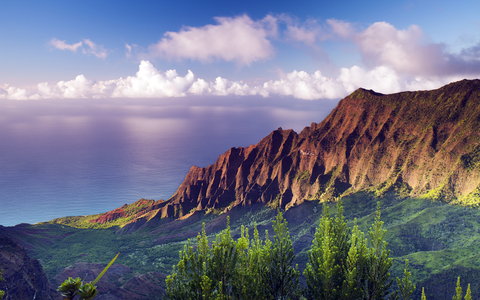

In [127]:
import PIL.Image
im = PIL.Image.open(wallpaper)
im.resize((im.size[0] / 4, im.size[1] / 4), resample=PIL.Image.LANCZOS)

In [128]:
ipynb_class = reg_read('HKCR\\.ipynb\\')[0]
print ipynb_class
ipynb_cmd = reg_read('HKCR\\' + ipynb_class + '\\shell\\open\\command\\')[0]
print ipynb_cmd

IPython.Notebook.File
cmd.exe /K ipython notebook "%1"


In [129]:
reg_enum_keys('HKCU')

['AppEvents',
 'Console',
 'Control Panel',
 'Environment',
 'EUDC',
 'Identities',
 'Keyboard Layout',
 'Network',
 'Printers',
 'Software',
 'System',
 'Uninstall',
 'Volatile Environment']

In [130]:
reg_enum_values('HKCU\\Software\\Microsoft\\Windows\\CurrentVersion\\Run')

[('', u'', 1),
 ('f.lux',
  u'"C:\\Users\\User\\AppData\\Local\\FluxSoftware\\Flux\\flux.exe" /noshow',
  1),
 ('TrueCrypt',
  u'"C:\\Program Files\\TrueCrypt\\TrueCrypt.exe" /q preferences /a logon',
  1),
 ('VeraCrypt',
  u'"C:\\Program Files\\VeraCrypt\\VeraCrypt.exe" /q preferences /a logon',
  1)]